<a href="https://colab.research.google.com/github/LagadapatiSriram/SCT_DS_/blob/main/SCT_DS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Loading data from the CSV file
file_path = "accidents.csv"
accident_data = pd.read_csv(file_path, parse_dates=["AccidentDate"])

In [14]:
# Display basic information about the dataset
print(accident_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AccidentDate      50000 non-null  object
 1   Timing            50000 non-null  object
 2   State             50000 non-null  object
 3   WeatherCondition  50000 non-null  object
 4   RoadCondition     50000 non-null  object
 5   Deaths            50000 non-null  int64 
 6   Reason            50000 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB
None


In [15]:
# Displaying summary statistics for numerical columns
print(accident_data.describe())

             Deaths
count  50000.000000
mean       4.983040
std        3.160581
min        0.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       10.000000


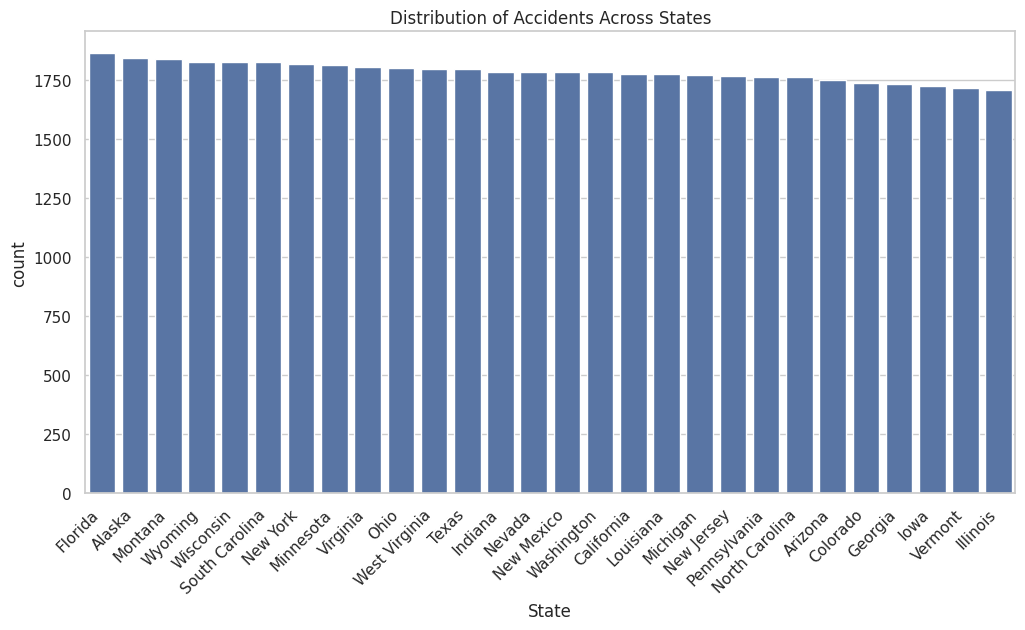

In [16]:
# Exploring the distribution of accidents across different states
plt.figure(figsize=(12, 6))
sns.countplot(x="State", data=accident_data, order=accident_data['State'].value_counts().index)
plt.title("Distribution of Accidents Across States")
plt.xticks(rotation=45, ha="right")
plt.show()

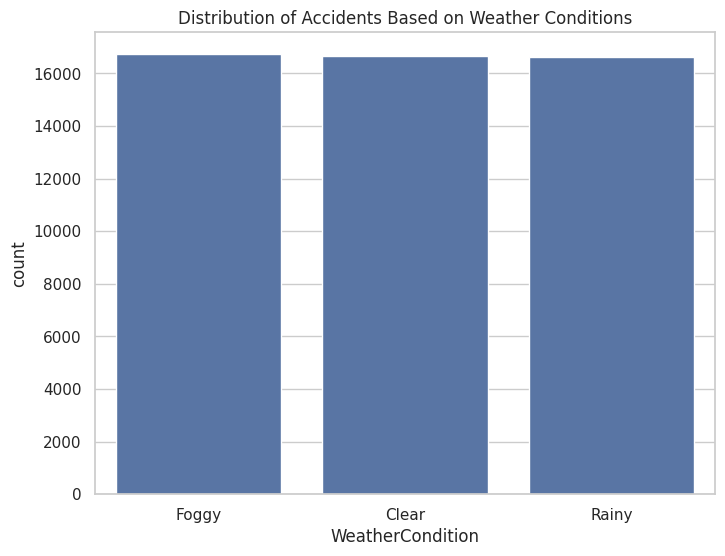

In [17]:
# Distribution of accidents based on weather conditions
plt.figure(figsize=(8, 6))
sns.countplot(x="WeatherCondition", data=accident_data, order=accident_data['WeatherCondition'].value_counts().index)
plt.title("Distribution of Accidents Based on Weather Conditions")
plt.show()

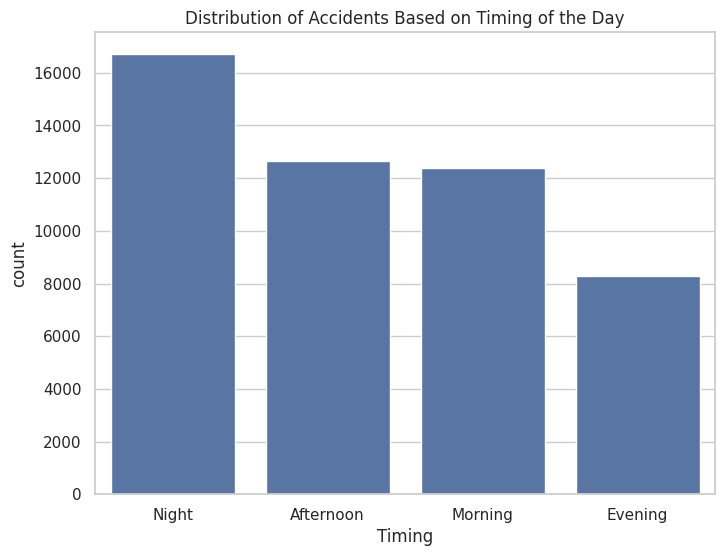

In [18]:
# Distribution of accidents based on the timing of the day
plt.figure(figsize=(8, 6))
sns.countplot(x="Timing", data=accident_data, order=accident_data['Timing'].value_counts().index)
plt.title("Distribution of Accidents Based on Timing of the Day")
plt.show()

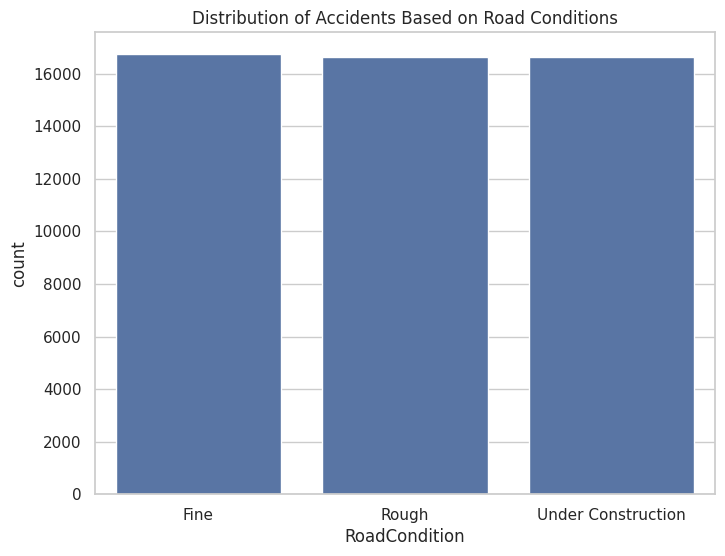

In [19]:
# Distribution of accidents based on road conditions
plt.figure(figsize=(8, 6))
sns.countplot(x="RoadCondition", data=accident_data, order=accident_data['RoadCondition'].value_counts().index)
plt.title("Distribution of Accidents Based on Road Conditions")
plt.show()

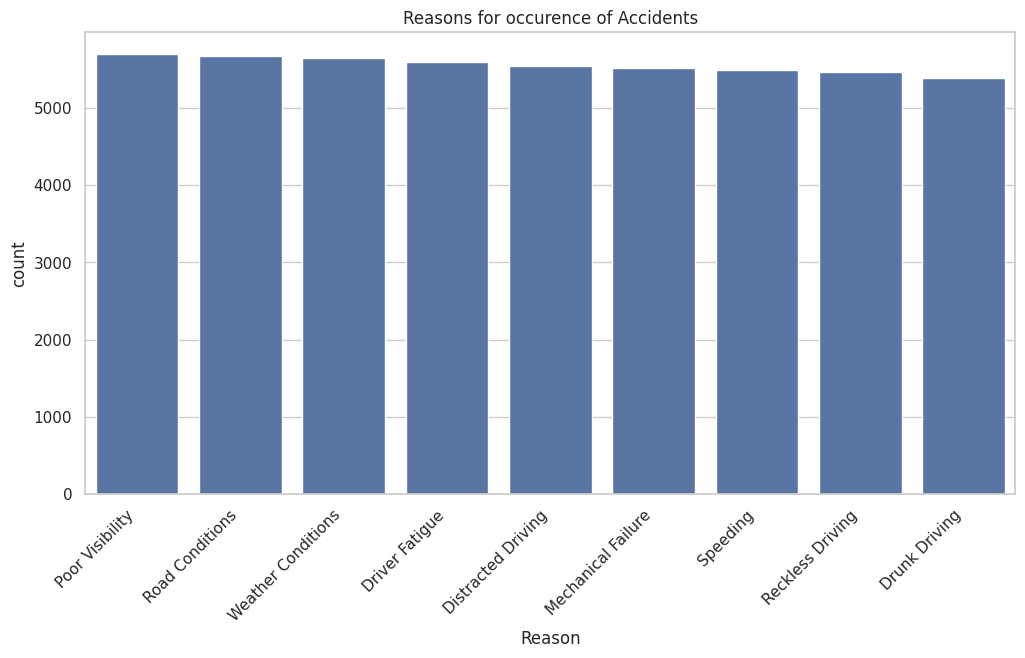

In [20]:
# Reasons for accidents
plt.figure(figsize=(12, 6))
sns.countplot(x="Reason", data=accident_data, order=accident_data['Reason'].value_counts().index)
plt.title("Reasons for occurence of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

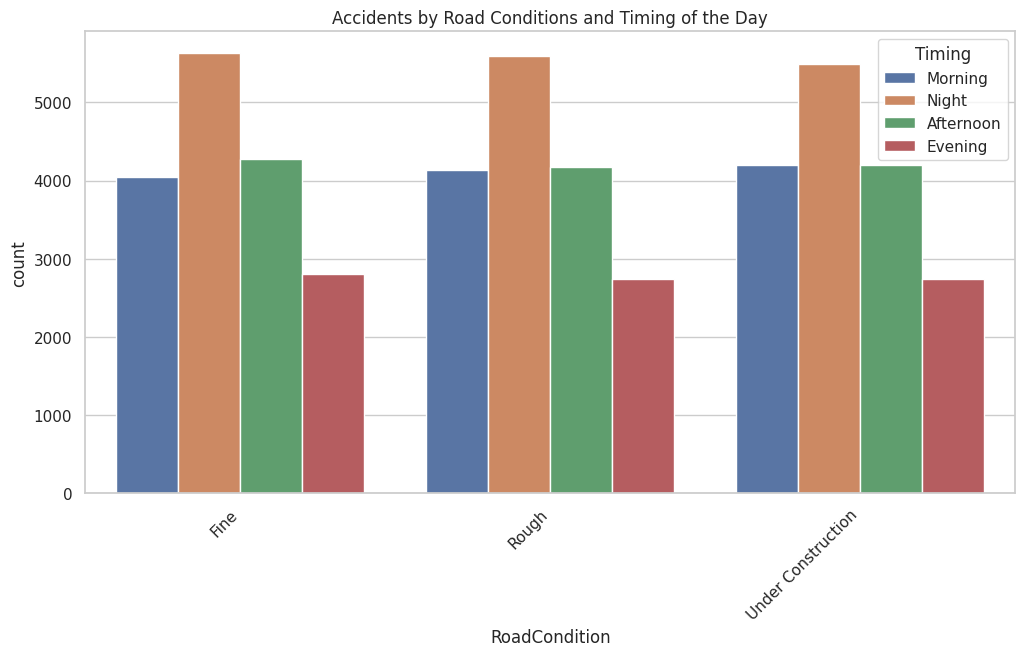

In [21]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Explore patterns related to road conditions
plt.figure(figsize=(12, 6))
sns.countplot(x="RoadCondition", hue="Timing", data=accident_data, order=accident_data['RoadCondition'].value_counts().index)
plt.title("Accidents by Road Conditions and Timing of the Day")
plt.xticks(rotation=45, ha="right")
plt.show()

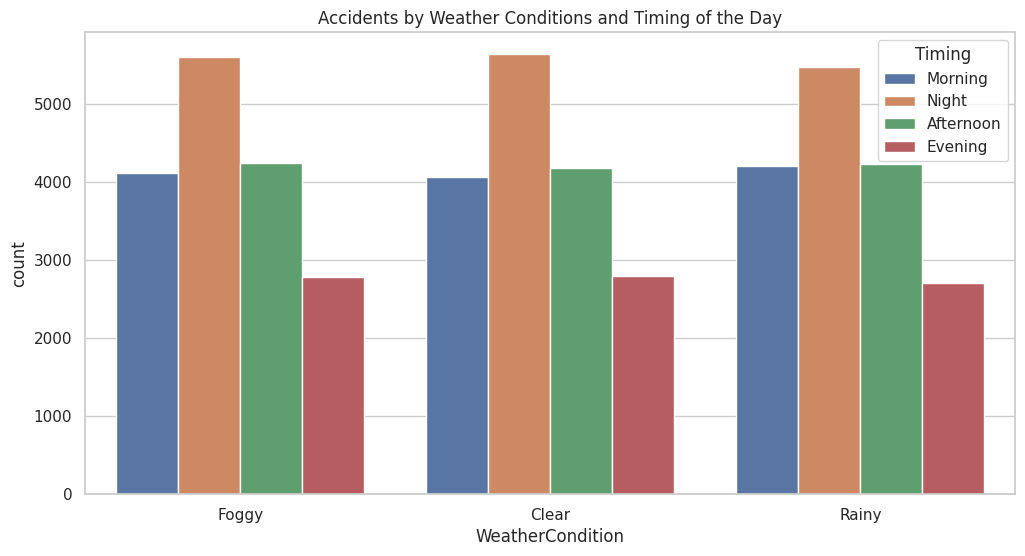

In [22]:
# Explore patterns related to weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(x="WeatherCondition", hue="Timing", data=accident_data, order=accident_data['WeatherCondition'].value_counts().index)
plt.title("Accidents by Weather Conditions and Timing of the Day")
plt.show()

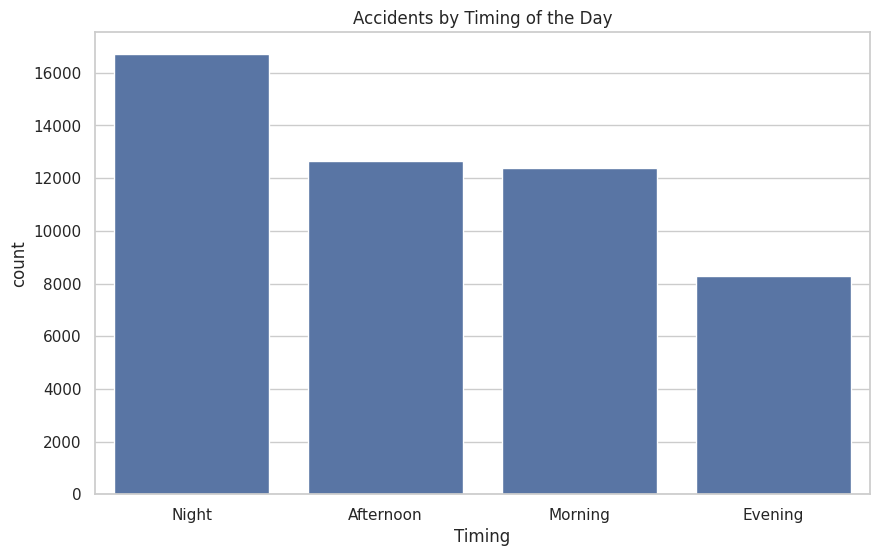

In [23]:
# Explore patterns related to time of day
plt.figure(figsize=(10, 6))
sns.countplot(x="Timing", data=accident_data, order=accident_data['Timing'].value_counts().index)
plt.title("Accidents by Timing of the Day")
plt.show()

<ipython-input-24-2dc3496a77a6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_accidents.index, y=state_accidents.values, palette="viridis")


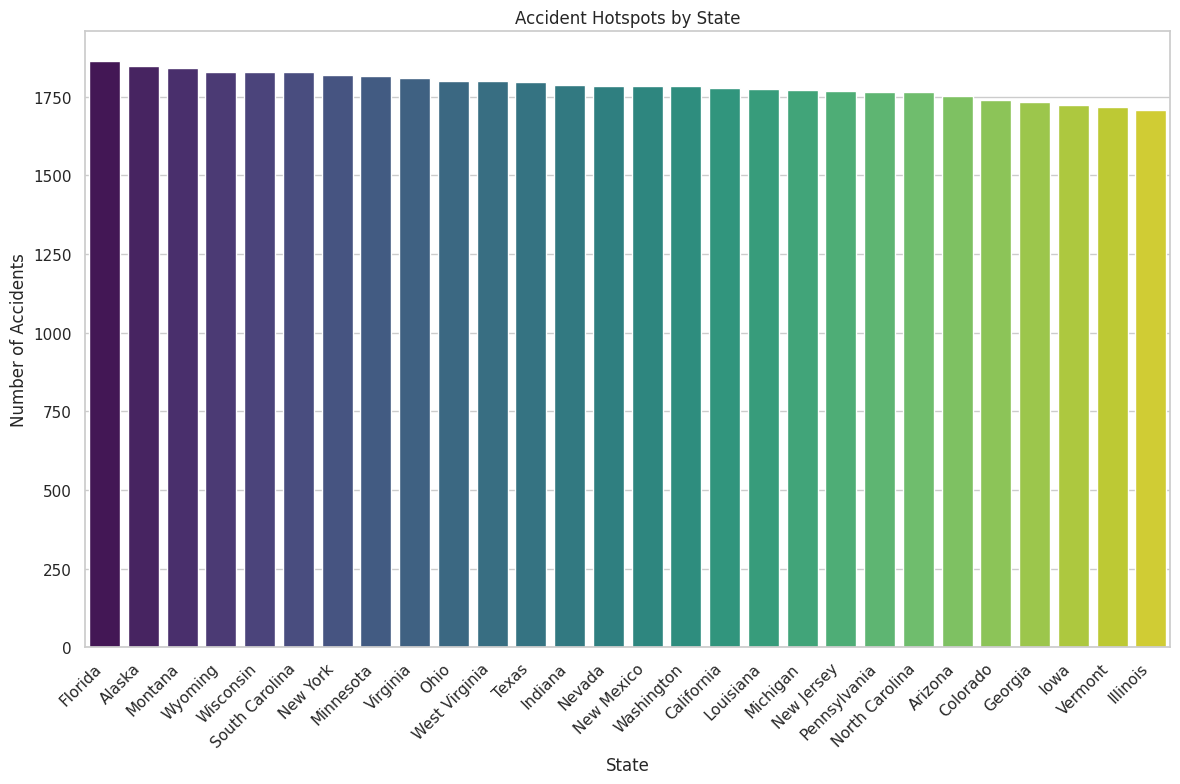

In [24]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Visualize accident hotspots (States with higher accident frequencies)
plt.figure(figsize=(14, 8))
state_accidents = accident_data['State'].value_counts()
sns.barplot(x=state_accidents.index, y=state_accidents.values, palette="viridis")
plt.title("Accident Hotspots by State")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

<ipython-input-25-0fc9178ea33c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reasons_accidents.index, y=reasons_accidents.values, palette="muted")


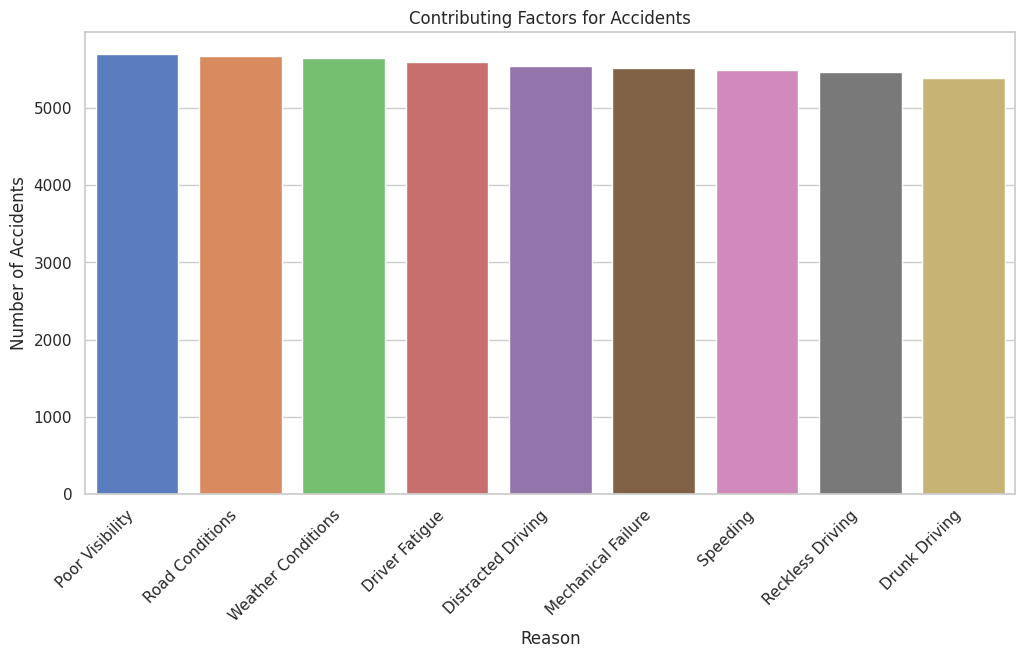

In [25]:
# Visualize contributing factors (Reasons for accidents)
plt.figure(figsize=(12, 6))
reasons_accidents = accident_data['Reason'].value_counts()
sns.barplot(x=reasons_accidents.index, y=reasons_accidents.values, palette="muted")
plt.title("Contributing Factors for Accidents")
plt.xlabel("Reason")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

<Figure size 4000x800 with 0 Axes>

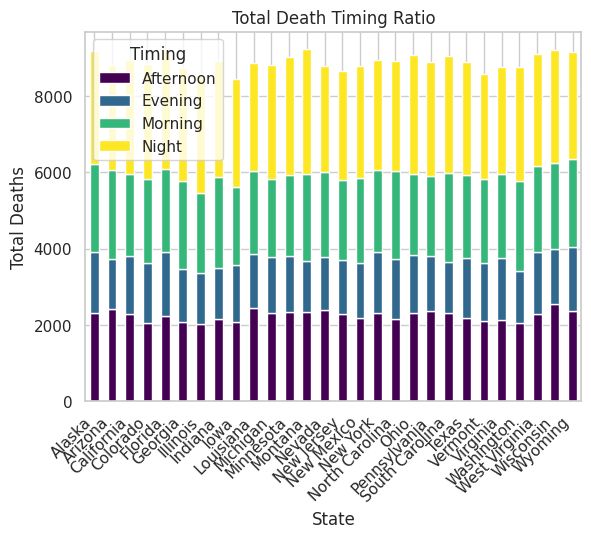

In [26]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Group the data by state and timing, and calculate the total number of deaths
state_timing_deaths = accident_data.groupby(['State', 'Timing'])['Deaths'].sum().reset_index()

# Pivot the table to get a format suitable for plotting
state_timing_deaths_pivot = state_timing_deaths.pivot(index='State', columns='Timing', values='Deaths').fillna(0)

# Create a bar plot for state-wise total death timing ratio
plt.figure(figsize=(40, 8))
state_timing_deaths_pivot.plot(kind='bar', stacked=True, colormap="viridis")
plt.title("Total Death Timing Ratio")
plt.xlabel("State")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Timing")
plt.show()